In [18]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

##### Automate the process of optimizing weight (w) and bias (b) using gradient descent.

In [19]:
# Load our data set

x_train = np.array([1.0, 2.0])   # Features
y_train = np.array([300.0, 500.0])   # Target value

In [20]:
# Define cost function (Mean Square Cost Function)

def compute_cost(x, y, w, b):
    
    m = x.shape[0]    # Number of training examples
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b      # Equation of line: y = m*x + c
        cost = (f_wb - y[i])**2
        cost_sum += cost
    
    total_cost = (1/(2*m)) * cost_sum

    return total_cost

In [21]:
# Define gradient function

def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """

    m = x.shape[0]    # Number of training examples
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]    # Obtained by taking gradient of cost function wrt. w
        dj_db_i = f_wb - y[i]           # Obtained by taking gradient of cost function wrt. b
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db     # Gradient of cost function wrt. w and wrt. b

In [22]:
# Implement gradient descent

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 

    ''' 
    x                 = Features
    y                 = Target Values
    w_in              = Initial weight 
    b_in              = Initial bias
    num_iters         = Number of iterations
    cost_function     = Function to compute cost
    gradient_function = Function to compute gradient
    alpha             = "learning rate"

    '''

    print(f"Iteration 0 | w: {w_in:.2f}, b: {b_in:.2f} | Cost: {cost_function(x, y, w_in, b_in):.2f}")  # Print initial weight, bias and cost

    for i in range(num_iters):
        
        w_in -= alpha * gradient_function(x, y, w_in, b_in)[0]   # Perform gradient descent
        b_in -= alpha * gradient_function(x, y, w_in, b_in)[1]
        
        if i < 9 or i > num_iters-11:  # Printing results of first and last few iterations only
            print(f"Iteration {i+1} | w: {w_in:.2f}, b: {b_in:.2f} | Cost: {cost_function(x, y, w_in, b_in):.2f}")
        if i == 10:
            print(f"...           | ...                        |...                                       ") 
    
    w_pred = w_in
    b_pred = b_in

    return w_pred, b_pred   # Return the weight and bias obtained after performing gradient descent

In [ ]:
# Implement gradient descent for our training set (x_train, y_train)

gradient_descent(x_train, y_train, 0, 0, 0.01, 10000, compute_cost, compute_gradient)

Iteration 0 | w: 0.00, b: 0.00 | Cost: 85000.00
Iteration 1 | w: 6.50, b: 3.90 | Cost: 79312.48
Iteration 2 | w: 12.78, b: 7.67 | Cost: 74005.57
Iteration 3 | w: 18.84, b: 11.31 | Cost: 69053.81
Iteration 4 | w: 24.70, b: 14.83 | Cost: 64433.42
Iteration 5 | w: 30.36, b: 18.22 | Cost: 60122.24
Iteration 6 | w: 35.83, b: 21.51 | Cost: 56099.57
Iteration 7 | w: 41.11, b: 24.67 | Cost: 52346.10
Iteration 8 | w: 46.21, b: 27.73 | Cost: 48843.82
Iteration 9 | w: 51.14, b: 30.69 | Cost: 45575.91
...           | ...                        |...                                       
Iteration 9991 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 9992 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 9993 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 9994 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 9995 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 9996 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 9997 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 9998 | w: 199.99, b: 100.01 | Cost: 0.00
Iteration 

(199.99403673949487, 100.00964679931117)

##### Therefore, our linear model is &nbsp;&nbsp;&nbsp;  y = 199.994 * x + 100.0096

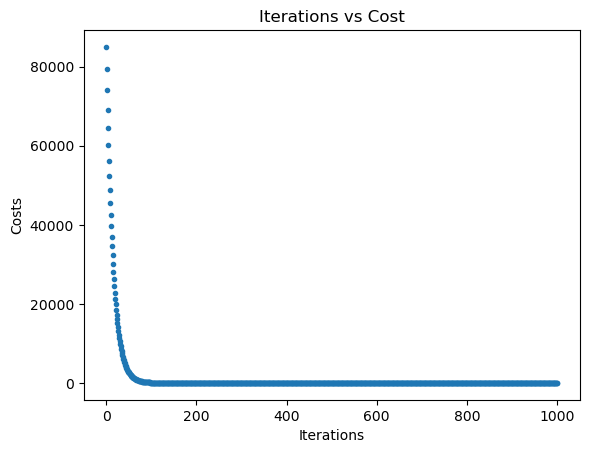

In [24]:
# Define function to plot iterations vs cost graph

def iterations_vs_cost_plot(x, y, num_iters, costs, w_in, b_in, alpha, gradient_function, compute_cost):
    
    costs = np.array([compute_cost(x_train, y_train, w_in, b_in)])  # Initial cost

    for i in range(num_iters):
        # Update weights and bias using gradient descent
        w_in -= alpha * gradient_function(x, y, w_in, b_in)[0]
        b_in -= alpha * gradient_function(x, y, w_in, b_in)[1]
        
        # Compute and store the cost
        cost = compute_cost(x, y, w_in, b_in)
        costs = np.append(costs, cost)
       
    # Plot iterations vs costs after the loop
    plt.plot(np.arange(num_iters+1), costs, marker='o', ms=3, ls='')  # Exclude initial cost
    plt.xlabel("Iterations")
    plt.ylabel("Costs")
    plt.title("Iterations vs Cost")
    plt.show()

# Example Usage
num_iters = 1000
alpha = 0.01
w_in, b_in = 0, 0  # Initial weights and bias
costs = np.array([])

iterations_vs_cost_plot(
    x_train, y_train, num_iters, costs, w_in, b_in, alpha, compute_gradient, compute_cost
)


##### We see that the Cost exponentially decreases with the number of iterations of the Gradient Descent algorithm. 